In [ ]:
# -*- coding: utf-8 -*-
"""
선형회귀분석 : 변수들 사이의 관계를 분석
독립변수 x_i, 상수항 b, 종속변수 y 사이의 관계를 모델링
    y = W * x + b
2차원 좌표계부터 시작
"""

In [28]:
import numpy as np

num_points = 1000
vector_set = []

for i in xrange(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vector_set.append([x1, y1])
    
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]

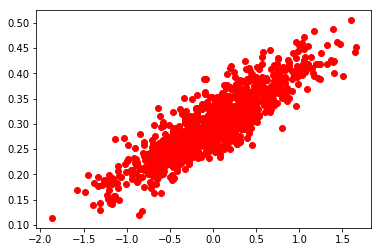

In [29]:
# pip install matplotlib
# If does not show any graph in Jupyter, add sentence that %matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
비용 함수와 경사 하강법 알고리즘
입력 데이터 x_data로부터 출력 값 y를 추정 할 수 있는 학습 알고리즘
즉, 이미 위에서 선형회귀라는 것을 알고 있기 때문에 y는 W,b로 표현 가능

y_data = W * x_data + b
(위에서 W가 0.1 , b가 0.3에 근사하다는 것을 알지만 텐서플로우는 모르니까....)

반복해서 정확한 결과를 얻기 : 비용함수(오차함수)를 이해해야함
* 비용함수(오차함수) : 얼마나 좋은 직선인지 측정

이 함수는 W,b를 매개변수로 받아 직선이 얼마나 데이터에 잘 맞는지! => 오차를 리턴함
따라서 비용함수로 평균제곱오차를 사용(mean square error) : 실제 값과 알고리즘이 반복마다 추정한 값 사이의 거리를 오차로 하는 값의 평균
"""

In [30]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b


loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

[-0.63165587] [ 0.31369877]
0 0.169259


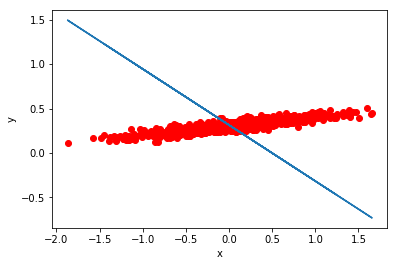

[-0.40219995] [ 0.30946296]
1 0.0804046


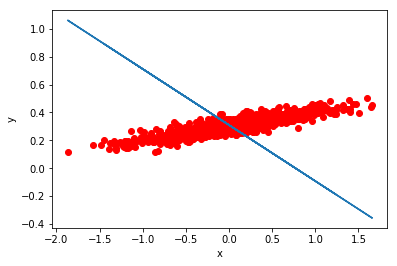

[-0.24454691] [ 0.30660242]
2 0.0384596


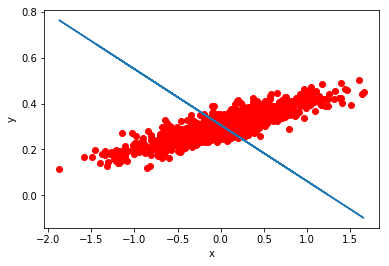

[-0.13622832] [ 0.30463699]
3 0.0186588


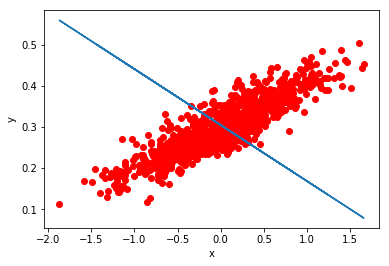

[-0.06180591] [ 0.30328661]
4 0.0093116


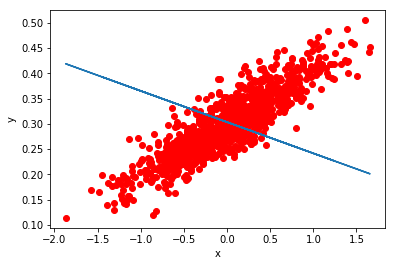

[-0.01067255] [ 0.30235881]
5 0.0048991


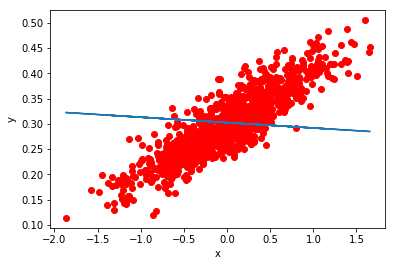

[ 0.02445963] [ 0.30172133]
6 0.00281611


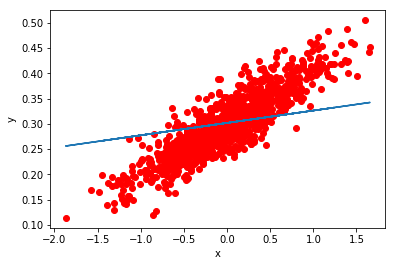

[ 0.04859788] [ 0.30128336]
7 0.00183281


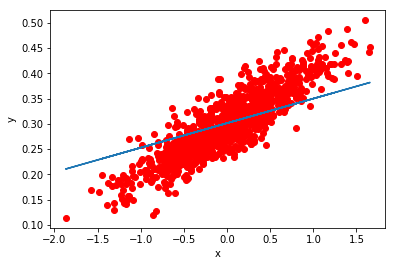

[ 0.06518254] [ 0.30098242]
8 0.00136863


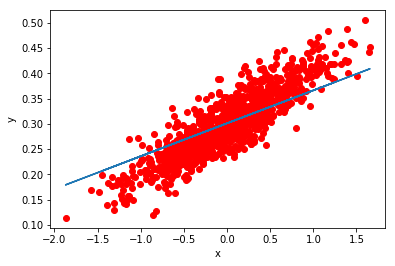

[ 0.07657734] [ 0.30077568]
9 0.0011495


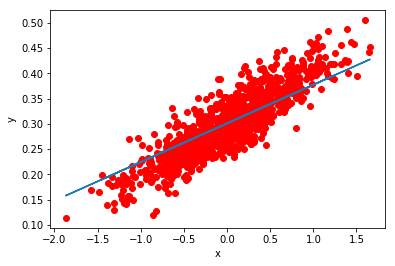

In [31]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)


for step in xrange(10):
    sess.run(train)
    print sess.run(W), sess.run(b)
    print step, sess.run(loss)

    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()